# Routing uncertainty analysis

1. Role of variation of performance
2. Role of numerical uncertainty

Key hypotheses;

1. The boat polars are dependent on the wind conditions. For the same wind scenario we should expect the shortest path time to scale linearly with the variation of performance. Differences could be due to the;
    - Wave resistance introducing speed penalities which do not scale with wind condition
    - Wind condition behaving in a non-linear manner.
2. As the grid resolution gets finer I would expect the shortest path time to increase slightly as the distance travelled would geometrically get longer as the domain is divided up into smaller sections. 

In [18]:
import os, sys, glob, re
import numpy as np
import pandas as pd
import matplotlib
# matplotlib.use('agg')
import scipy.stats as scis
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

plt.rcParams['savefig.dpi'] = 400
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 12
# plt.rcParams['text.usetex'] = True
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = """\\usepackage{subdepth},
                                         \\usepackage{type1cm}"""
%matplotlib inline

## Performance variation

In [19]:
def pc_difference(df):
    """Calculate the pc difference between voyage results and mean voyaging time."""
    df.index = pd.to_datetime(df.index)
    means = df.mean(axis=1)
    df = df.sub(means, axis=0)
    df = df.div(means, axis=0)
    return df


def plot_scatter(df):
    plt.figure()
    perf_variation = np.array([float(x) for x in df.columns.values])
    response = df.mean(axis=0).values
    plt.scatter(perf_variation, response, label="Performance mean pc variation")
    slope, intercept, r_value, p_value, std_err = scis.linregress(perf_variation, response)
    f = lambda x: slope*x + intercept
    x = np.array([0.85,1.15])
    plt.plot(x, f(x), label=r"Fitted line, r$^2$ = {:03.2f}".format(r_value))
    plt.legend()
    plt.show()
#     plt.savefig("nd_performance_scatter.png")

In [29]:
# pwd = "/Users/thomasdickson/sail_route.jl/development"  # old data
pwd = "/Users/thomasdickson/iridis5/sail_route.jl/development"
path = "/polynesian/boeckv2/_routing_upolu_to_moorea_1982-01-01T00:00:00_to_1982-11-01T00:00:00_10.0_nm.txt"
df = pd.read_csv(pwd+path, index_col=0)
df_voyages = pc_difference(df)
print(list(df_voyages))

['0.5', '0.5526315789473685', '0.6052631578947368', '0.6578947368421052', '0.7105263157894737', '0.7631578947368421', '0.8157894736842105', '0.8684210526315789', '0.9210526315789473', '0.9736842105263158', '1.0263157894736843', '1.0789473684210527', '1.131578947368421', '1.1842105263157896', '1.2368421052631577', '1.289473684210526', '1.3421052631578947', '1.394736842105263', '1.4473684210526316', '1.5']


In [31]:
def identify_linear_relationships(df):
    """For each row of performance results identify whether there is a linear correlation. Save the linear correlation as an extra column."""
    perf_variation = np.array([float(x) for x in df.columns.values])
    f = lambda x: np.corrcoef(perf_variation, x)[0, 1]
    cor_coeffs = df.apply(f, axis=1)
    df['corr coeff'] = cor_coeffs
    return df

# df_lin_cor = identify_linear_relationships(df_voyages)
print(df_lin_cor['corr coeff'].describe())

count    609.000000
mean      -0.946570
std        0.036239
min       -0.996437
25%       -0.973649
50%       -0.955065
75%       -0.930625
max       -0.816755
Name: corr coeff, dtype: float64


/Users/thomasdickson/miniconda3/envs/ml_analysis/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


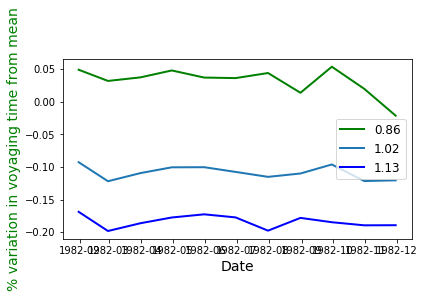

In [24]:
monthly = df_voyages.resample('M').mean()
fig = plt.figure()

plt.plot(monthly.index, monthly['0.8684210526315789'], 'g-', label="0.86")
plt.plot(monthly.index, monthly['1.0263157894736843'], label="1.02")
plt.plot(monthly.index, monthly['1.131578947368421'], 'b-', label="1.13")

plt.xlabel('Date')
plt.ylabel('% variation in voyaging time from mean', color='g')
plt.legend()
plt.tight_layout()
plt.show()

## GCI index

1. Calculate the GCI index. Done
2. Plot the relationship between GCI and voyaging time/mean voyaging time
2. Plot the relationship between performance variation and GCI index
3. 

/Users/thomasdickson/miniconda3/envs/ml_analysis/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


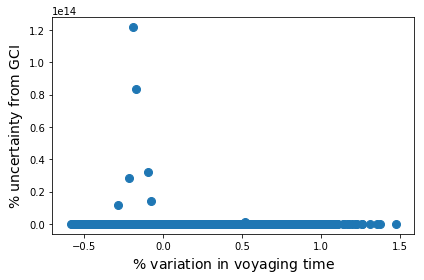

In [49]:
# plot gci index as a function of time

def load_gci_index():
    path1 = "/polynesian/boeckv2/_routing_upolu_to_moorea_1982-01-01T00:00:00_to_1982-11-01T00:00:00_GCI.txt"
    df = pd.read_csv(pwd+path1)
    df = df.set_index(pd.DatetimeIndex(df.iloc[:,-1]))
    df = df.fillna(0)
    df = df[df.columns[:-1]]
    return df

df_gci_index = load_gci_index()
nd_gci = df_gci_index.values * 100.0
nd_times = df_voyages[df_voyages.columns[:-1]].values

plt.figure()
plt.scatter(nd_times, nd_gci)
plt.ylabel("$\%$ uncertainty from GCI")
plt.xlabel("$\%$ variation in voyaging time")
plt.tight_layout()
plt.show()

Looks like there are some voyages which have some sort of crazy relationships going on.

1. For what voyages are the GCI values above 10%? 
1. For these voyages, what are the actual statistics. Identify these voyages with large amounts of associated uncertainty.

/Users/thomasdickson/miniconda3/envs/ml_analysis/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


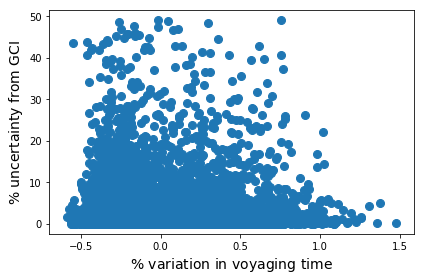

In [40]:
threshold = 50.0
plt.figure()
plt.scatter(nd_times[nd_gci<threshold].ravel(), nd_gci[nd_gci<threshold].ravel())
plt.ylabel("$\%$ uncertainty from GCI")
plt.xlabel("$\%$ variation in voyaging time")
plt.tight_layout()
plt.show()

Quite a lot of voyages appear to have high GCI indexes. It kind of looks normally distributed.

This graph is implying that variation in voyaging time is causing GCI index. Is this the right implication? What factors could be related to GCI index?

- Choice of heights in the discretization of environment. Typically the heights are 1, 2, 4 - in the example problem for example. Change to 10nm, 20nm, 40 nm?
- The weather. The weather conditions are the chaotic/random element in the modelling process. What parameters could be used to relate each set of weather conditions to the output?

A high GCI index indicates that the solution method is sensitive. As the resolution increases the algorithm might pick up weather conditions in the domain which were previously too fine to be seen.

Perhaps it doesn't make sense to relate GCI index to voyaging time - perhaps it should be related to the weather data. 

Does it make more sense for the GCI index to be related to the fidelity of the weather data.

1. For those voyages with high GCI indexes what are the weather conditions?
2. What is going on? Is there anything going on?

One idea could be to quantify how much a weather scenario changes using a non-dimensional value. I could then plot this non dimensional value against non dimensionalised voyaging time, or, magnitude of voyaging time and see if there are any relationships.

1. Chaotic nature of weather scenario - what quantity could this even be?

## Initial conclusions

So far these results show that;

1. GCI index is not indicating that the solution process is converging. 
2. Linear variation of performance scales voyaging time linearly around $\pm 15\%$ about the original performance polars.

In order to examine whether a step change in voyaging time occurs as a result of varying the performance it is necessary to vary the performance beyond $\pm 15\%$.

Next steps;

1. Change the heights, $d_n$, simulated from $10, 15, 20$ nm to distance $10, 20, 40$. Perhaps this will lead the results to settle down somewhat.
2. Vary the performance by $50\%$ and see what happens. At what point does the model begin to break down?

What are the edge cases? 

1. Where is there a non-linear response? Indicates weather variation.

Is there scope for me to invent weather scenarios which do trigger a non-linear response? How could it be possible to relate the speed of the weather to the speed of a sailing craft.

Identify the key weather scenarios and then see if those generate something interesting

# Evaluate changed GCI index 

- Changed the grid heights to 10, 20, 40 nm.
- Where are the inf values creeping in? How do I prevent these values being calculated?

In [42]:
df_gci_index.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
start_times,,,,,,,,,,,,,,,,,,,,
1982-01-01 00:00:00,0.008098,0.002472,0.006053,0.000689,0.020764,0.044742,0.001672,0.000135,0.001987,0.020328,0.145506,0.000000,0.049726,0.001742,0.000584,0.010360,0.016395,0.083268,0.019188,0.022730
1982-01-01 12:00:00,0.009292,0.013767,0.002342,0.013900,0.006615,0.000019,0.383167,0.002621,0.013767,0.005744,0.011701,0.187461,0.003541,0.006053,0.009204,0.003978,0.008591,0.005418,0.000611,0.055576
1982-01-02 00:00:00,0.006042,0.235499,0.009234,0.000005,0.001637,0.015946,0.003146,0.001176,0.000405,0.000028,0.003415,1.374969,0.000114,0.006946,0.065005,0.001720,0.072991,0.072855,0.004549,0.005088
1982-01-02 12:00:00,0.001275,0.155500,0.012550,0.012549,0.009613,0.000366,0.000009,0.001020,0.002665,0.001550,0.003772,0.005564,0.022173,0.007074,0.001376,0.005480,0.000439,0.245142,0.417603,0.015623
1982-01-03 00:00:00,0.001023,0.005416,0.035801,0.003026,0.010113,0.003194,0.008142,0.000006,0.103700,0.001789,0.000075,0.001030,0.023424,0.018826,0.004689,0.164977,0.010459,0.009203,0.003034,0.000416


In [43]:
df_gci_index.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
count,6.090000e+02,6.090000e+02,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,6.090000e+02,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,1.070072e-01,1.687736e+07,0.038399,inf,0.045042,inf,0.054131,inf,inf,inf,inf,inf,inf,4.091793e+09,inf,0.032143,inf,0.082074,0.030584,inf
std,1.949102e+00,4.164982e+08,0.163370,NaN,0.402461,NaN,0.275008,NaN,NaN,NaN,NaN,NaN,NaN,6.135716e+10,NaN,0.168514,NaN,1.201133,0.129449,NaN
min,9.965643e-08,2.061259e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.813234e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.878880e-04,9.017577e-04,0.000765,0.000723,0.000735,0.000698,0.000603,0.000765,0.000836,0.000736,0.000695,0.000794,0.000788,9.012618e-04,0.000633,0.000784,0.000745,0.000671,0.000643,0.000871
50%,4.610057e-03,4.541643e-03,0.004032,0.003794,0.004087,0.004344,0.003813,0.004173,0.004254,0.003854,0.003905,0.004067,0.004737,4.757670e-03,0.004278,0.003897,0.004408,0.003408,0.003564,0.004236
75%,1.510066e-02,1.859182e-02,0.018438,0.013900,0.016061,0.016315,0.016554,0.017195,0.019317,0.015773,0.013523,0.016603,0.020824,2.057492e-02,0.017658,0.015548,0.018763,0.016463,0.016064,0.018629
max,4.807432e+01,1.027831e+10,2.772375,inf,9.504446,inf,3.652433,inf,inf,inf,inf,inf,inf,1.217097e+12,inf,3.295205,inf,29.409765,2.214688,inf


In [48]:
def find_infs(df):
    """Find the location of inf values."""
    rows = df.index[np.isinf(df).any(1)]
    columns = df.columns.to_series()[np.isinf(df).any()]
    print("Performances ; ", rows)
    print("Times ; ", columns)

find_infs(df_gci_index)

Performances ;  DatetimeIndex(['1982-01-04 12:00:00', '1982-01-23 12:00:00',
               '1982-02-04 00:00:00', '1982-02-09 12:00:00',
               '1982-04-12 12:00:00', '1982-04-29 00:00:00',
               '1982-05-14 12:00:00', '1982-05-19 00:00:00',
               '1982-07-10 12:00:00', '1982-08-02 00:00:00',
               '1982-08-09 00:00:00', '1982-08-22 12:00:00',
               '1982-08-26 12:00:00', '1982-09-04 00:00:00',
               '1982-09-25 00:00:00', '1982-10-30 12:00:00'],
              dtype='datetime64[ns]', name='start_times', freq=None)
Times ;  x4      x4
x6      x6
x8      x8
x9      x9
x10    x10
x11    x11
x12    x12
x13    x13
x15    x15
x17    x17
x20    x20
dtype: object
